# Identify gender by voice using CNN
The text in the document by < Zhixin Wang, Jiamin Shang > is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/<br>
The code in the document by < Zhixin Wang, Jiamin Shang > is licensed under the MIT License https://opensource.org/licenses/MIT

This study attempts to identify gender by analyzing voice. We transformed the sound file into csv file, used CNN network as our training model and identified test voice by the model we generated. Features that have different density distribution on different genders would be considered as model input. After the preprocessed data is used to generate training model, our test data indicated that our model has a good performance, the accuracy is over 95%.

## Introduction
### Motivation & Background
Speech recognition is everywhere, the most representative one is smartphone. Siri can understand what you said, it can tell whether you are the owner of this cell phone, it can set a alarm clock or call your friends when you are busy preparing food in kitchen. So we want to know the performance of speech recognition, how accurate it can be, how sensitive it could be to a voice. In addition, our project can let us understand how machine learning techniques help build the architecture of speech recognition.

## Install the library by anaconda or pip

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
import math
import tensorflow as tf
import os
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 9)

## Feature Engineering
* The summary statistics. The first step is to load data, the dataset has more than 3000 records and includes 21 potential attributes to describe a voice. But we have to figure out is every attribute is meaningful for our research goal. Density distribution helps us to make it happen.

In [2]:
voice = pd.read_csv('./data/voicetrain.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


* check missing value

In [3]:
voice['meanfreq'].isnull().value_counts()

False    2769
Name: meanfreq, dtype: int64

In [4]:
voice.shape

(2769, 21)

In [5]:
voicemale = voice[voice['label'].isin(['male'])]
voicemale.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1344,0.178708,0.059930,0.191608,0.115294,0.220157,0.104863,2.173189,8.533463,0.902936,0.433659,...,0.178708,0.116731,0.047013,0.279070,1.054688,0.023438,5.156250,5.132812,0.095337,male
1345,0.191543,0.058254,0.209327,0.133942,0.235577,0.101635,1.135948,3.706959,0.913581,0.396913,...,0.191543,0.127359,0.047856,0.275862,1.545259,0.117188,5.156250,5.039062,0.231664,male
1346,0.179838,0.060027,0.188984,0.123883,0.219955,0.096072,1.453532,4.820096,0.912606,0.432740,...,0.179838,0.119143,0.047384,0.269663,0.943359,0.023438,4.453125,4.429688,0.164021,male
1347,0.180473,0.060354,0.202522,0.117688,0.221156,0.103468,1.795643,5.844935,0.912069,0.481726,...,0.180473,0.118442,0.046967,0.269663,1.672783,0.023438,9.398438,9.375000,0.145488,male
1348,0.178447,0.061707,0.188644,0.119831,0.221271,0.101441,1.704189,6.168005,0.921361,0.502833,...,0.178447,0.128262,0.047478,0.271186,1.082386,0.023438,4.664062,4.640625,0.189655,male


In [6]:
voicefemale = voice[voice['label'].isin(['female'])]
voicefemale.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1349,0.174401,0.031323,0.172542,0.162018,0.183066,0.021048,2.900473,11.154348,0.816741,0.202109,...,0.174401,0.159755,0.016145,0.219178,0.969375,0.164062,6.539062,6.375000,0.097613,female
1350,0.179355,0.033727,0.174444,0.162500,0.196667,0.034167,2.649251,10.567270,0.843056,0.235185,...,0.179355,0.159020,0.016113,0.271186,0.767428,0.156250,6.281250,6.125000,0.125612,female
1351,0.175791,0.037901,0.173992,0.162239,0.189202,0.026963,2.808492,11.229370,0.852621,0.280650,...,0.175791,0.157736,0.026622,0.195122,0.493952,0.085938,5.578125,5.492188,0.112281,female
1352,0.183481,0.031576,0.181087,0.170815,0.198587,0.027772,3.224484,15.510407,0.815591,0.203101,...,0.183481,0.171749,0.044321,0.213333,0.773438,0.164062,6.882812,6.718750,0.128044,female
1353,0.183358,0.034865,0.181053,0.172105,0.195789,0.023684,3.350340,15.917992,0.817365,0.233875,...,0.183358,0.172607,0.084656,0.246154,0.859375,0.171875,6.062500,5.890625,0.221003,female


## Analysis of density distribution
* Density estimate with every column's data distribution, it will help us to choose input parameters and reshaped the dataset

In [7]:
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 5)

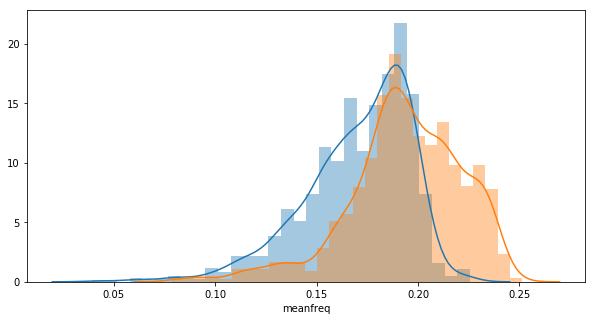

In [8]:
sns.distplot(voicemale['meanfreq'])
sns.distplot(voicefemale['meanfreq'])

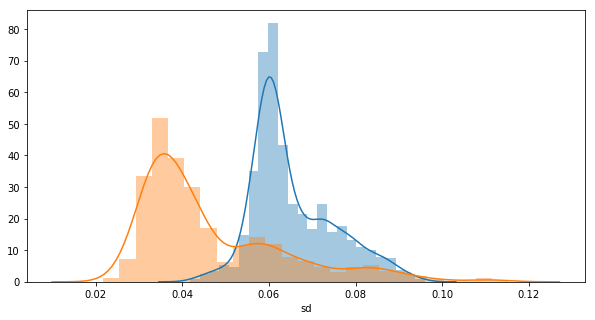

In [9]:
sns.distplot(voicemale['sd'])
sns.distplot(voicefemale['sd'])

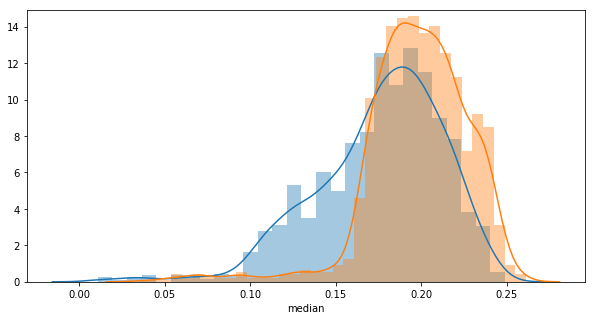

In [10]:
sns.distplot(voicemale['median'])
sns.distplot(voicefemale['median'])

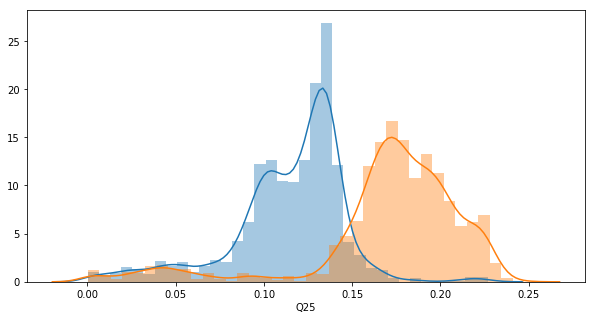

In [11]:
sns.distplot(voicemale['Q25'])
sns.distplot(voicefemale['Q25'])

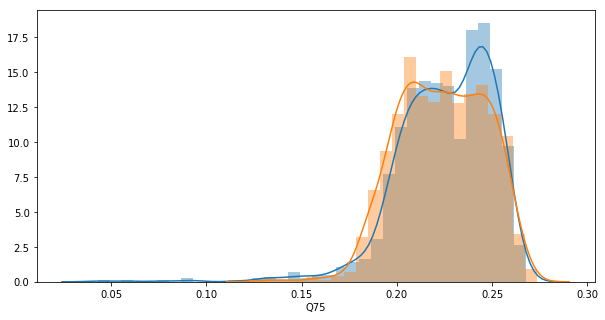

In [12]:
sns.distplot(voicemale['Q75'])
sns.distplot(voicefemale['Q75'])

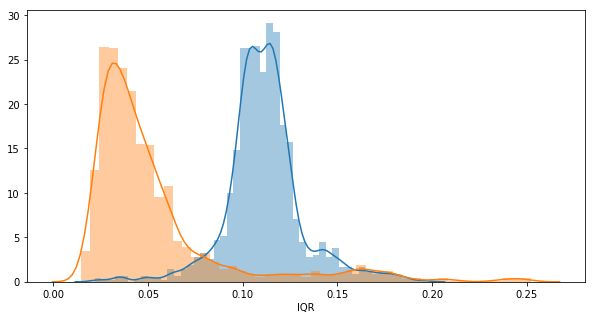

In [13]:
sns.distplot(voicemale['IQR'])
sns.distplot(voicefemale['IQR'])

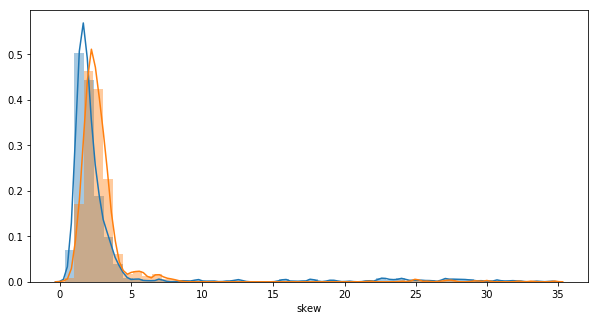

In [14]:
sns.distplot(voicemale['skew'])
sns.distplot(voicefemale['skew'])

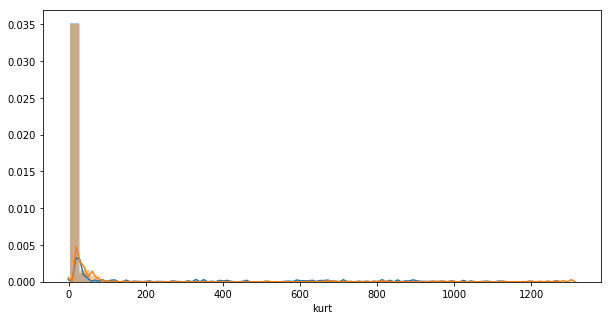

In [15]:
sns.distplot(voicemale['kurt'])
sns.distplot(voicefemale['kurt'])

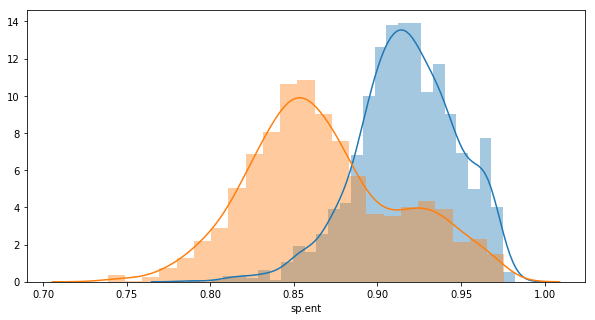

In [16]:
sns.distplot(voicemale['sp.ent'])
sns.distplot(voicefemale['sp.ent'])

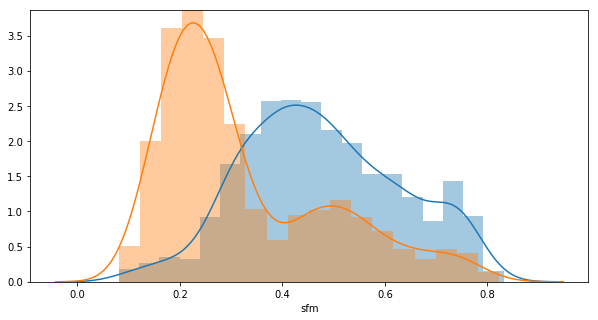

In [17]:
sns.distplot(voicemale['sfm'])
sns.distplot(voicefemale['sfm'])

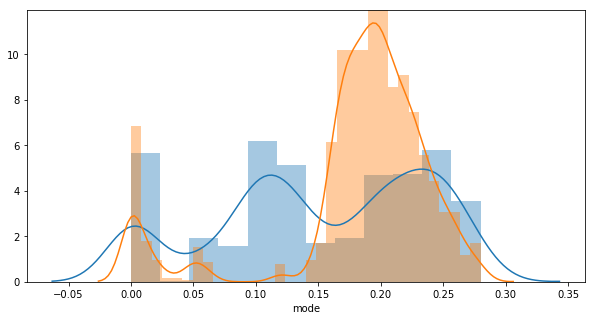

In [18]:
sns.distplot(voicemale['mode'])
sns.distplot(voicefemale['mode'])

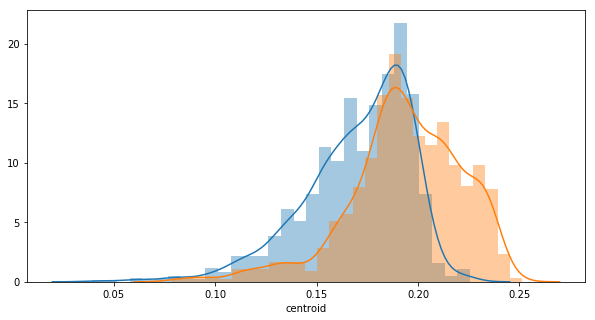

In [19]:
sns.distplot(voicemale['centroid'])
sns.distplot(voicefemale['centroid'])

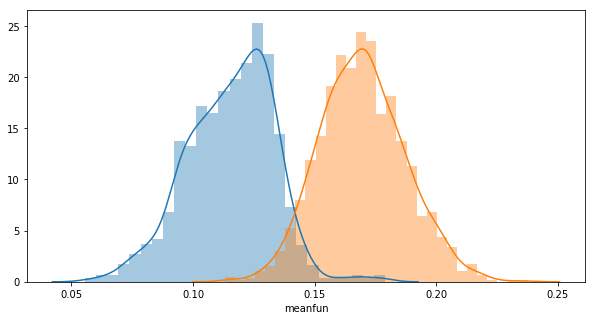

In [20]:
sns.distplot(voicemale['meanfun'])
sns.distplot(voicefemale['meanfun'])

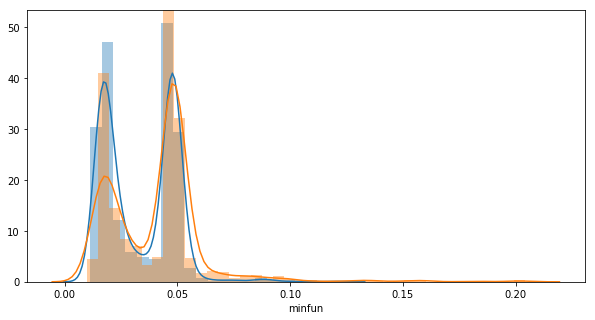

In [21]:
sns.distplot(voicemale['minfun'])
sns.distplot(voicefemale['minfun'])

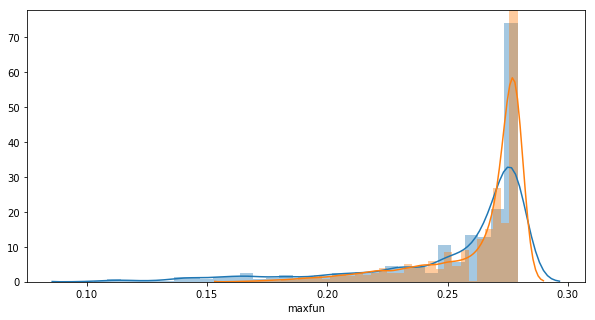

In [22]:
sns.distplot(voicemale['maxfun'])
sns.distplot(voicefemale['maxfun'])

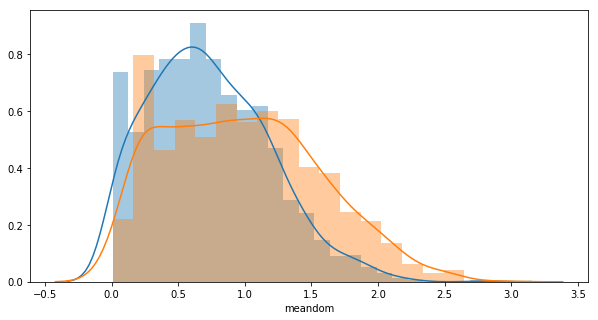

In [23]:
sns.distplot(voicemale['meandom'])
sns.distplot(voicefemale['meandom'])

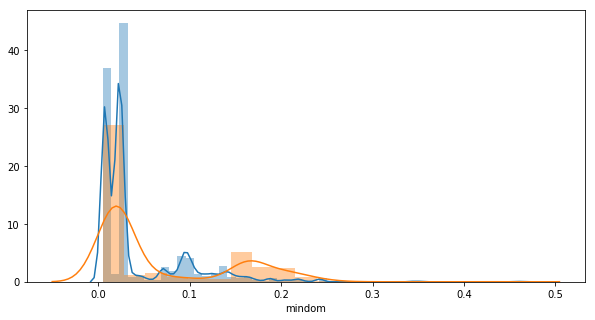

In [24]:
sns.distplot(voicemale['mindom'])
sns.distplot(voicefemale['mindom'])

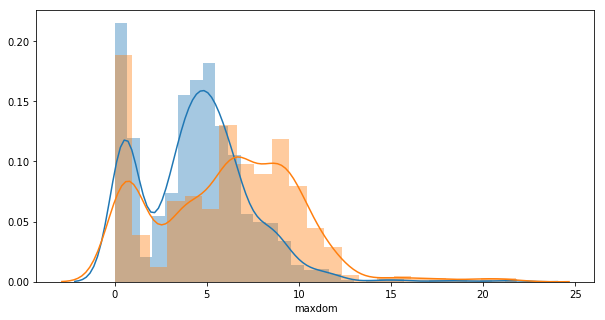

In [25]:
sns.distplot(voicemale['maxdom'])
sns.distplot(voicefemale['maxdom'])

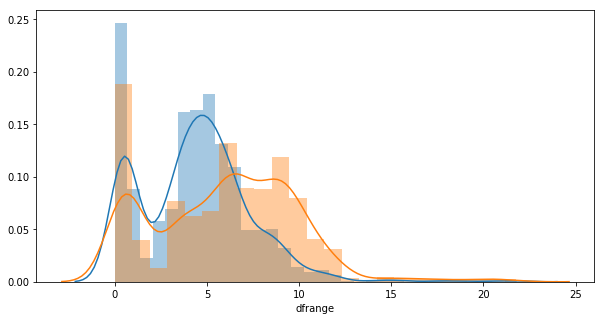

In [26]:
sns.distplot(voicemale['dfrange'])
sns.distplot(voicefemale['dfrange'])

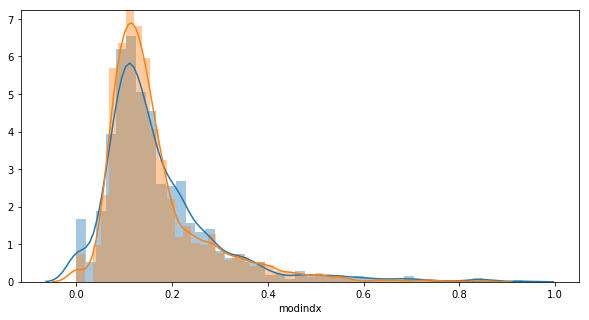

In [27]:
sns.distplot(voicemale['modindx'])
sns.distplot(voicefemale['modindx'])

## Load data from csv
    * read the train and test data by pandas 
    * scramble data order
    * reshaped the dataset
After the analysis of density distribution, 16 of them were chosen as the input parameters. We reshaped the dataset as our input dataset, and mapped the gender label to make each record distinguishable using [1,0] and [0,1]. Accordingly, split the dataset into training set and test set.

In [28]:
voicetrain = pd.read_csv('./data/voicetrain.csv')
voicecp = voicetrain.sample(frac=1).reset_index(drop=True)
traininput = voicecp.loc[:, ['meanfreq','sd','median','Q25','skew','IQR','sp.ent','sfm','mode','centroid','meanfun','minfun','meandom','maxdom','mindom','dfrange']].values.tolist()
trainresult = voicecp.loc[:, 'label'].values
voicetest = pd.read_csv('./data/voicetest.csv')
voicecps = voicetest.sample(frac=1).reset_index(drop=True)
testinput = voicecps.loc[:, ['meanfreq','sd','median','Q25','skew','IQR','sp.ent','sfm','mode','centroid','meanfun','minfun','meandom','maxdom','mindom','dfrange']].values.tolist()
testresult = voicecps.loc[:, 'label'].values

For example, from the below two plots, we could tell that IQR has distinct difference while kurt does not.
<img src="./data/img/des2.jpg" width="100%">

### Map the gender label to 0,1 set

In [29]:
def convert_label(result):
    resultx = []
    for res in result:
        restmp = []
        if res == 'male':
            restmp = [0,1]
        elif res == 'female':
            restmp = [1,0]
        resultx.append(restmp)
    return resultx

In [30]:
def outputres(reslist):
    result = []
    for res in reslist:
        if res == 0:
            result.append('female')
        elif res == 1:
            result.append('male')
            
    return result

In [31]:
result_train = convert_label(trainresult)
result_test=  convert_label(testresult)

## Algorithm CNN
Convolutional neural network is very similar to the ordinary Deep Neural Network, they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, and produces non-linearity output. And they still have a loss function on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply. 
<img src="./data/img/cnn1.jpg" width="100%">
The whole network is different at ConvNet and MaxPoolNet, which is designed for input that have too many dimensions,30\*30 image would have 30\*30\*3 dimensions input. ConvNet would use a small local receptive field to scan the input which is be able to reduce the dimensions to save time and resource to train our model. And MaxPoolNet is like to calculate the value from the feature map that we got from last layer, the method maybe the maximum value of ConvNet output or average value of it.
<img src="./data/img/cnn2.jpg" width="100%">

### Define initialization method
    * weight and bias for every layer
    * ConvNet 
    * MaxpoolNet 
### this part will be used to build network
Then we defined the parameters that used for the training of neural network, and the ConvNet and MaxpoolNet function, we will use a 2*2 receptive field to scan the whole 16 dimensions  input and the stride is 1,  then we take the maximum value of receptive field before we send it to the activation function.

In [32]:
def weight_variable(shape,stddev):
    #initializer = tf.contrib.layers.xavier_initializer()
    initial = tf.truncated_normal(shape, stddev=stddev)
    return tf.Variable(initial)

def bias_variable(shape,stddev):
    initial = tf.constant(stddev, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    """
    we will use a 2*2 re`ceptive field to scan the whole 16 dimensions, input and the stride is 1
    """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    """
    we take the maximum value of receptive field before we send it to the activation function.
    """
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')  

### Build the neural network
### Initialize the placeholder
    * inputdata
    * outputdata
    * dropout variable to avoid the overfitting situation
### Implement layers
    * three hidden layers
    * Softmax as the classification activation function
    
The third part of our work is to build the architecture of our neural network. We implemented three hidden layers in the network, for example, in the first hidden layer, we used 2*2 patch to calculate 6 features, 1 means the input channel and 6 means the output channel, 0.01 is the parameter for the initialization of weights. In addition, we set the dropout variable to avoid the overfitting situation. 

In [33]:
with tf.name_scope('data'):
    X = tf.placeholder("float", [None, 16])
    Y = tf.placeholder("float", [None, 2])

    x_image = tf.reshape(X, [-1,4,4,1])

with tf.name_scope('parameters'):
    with tf.name_scope('inputlayer'):
        W_conv1 = weight_variable([2, 2, 1, 6],0.01)  
        # we used 2*2 patch to calculate 6 features, 1 means the input channel and 6 means the output channel
        # 0.01 is the parameter for the initialization of weights
        b_conv1 = bias_variable([6],0.01)
        h_conv1 = tf.nn.elu(conv2d(x_image, W_conv1) + b_conv1)
        h_pool1 = max_pool_2x2(h_conv1)
        
        tf.summary.histogram('W_conv1',W_conv1)
        tf.summary.histogram('b_conv1',b_conv1)

    with tf.name_scope('hiddenlayer1'):
        W_conv2 = weight_variable([2, 2, 6, 12],0.01)
        b_conv2 = bias_variable([12],0.01)
        h_conv2 = tf.nn.elu(conv2d(h_pool1, W_conv2) + b_conv2)
        h_pool2 = max_pool_2x2(h_conv2)
        
        tf.summary.histogram('W_conv2',W_conv2)
        tf.summary.histogram('b_conv2',b_conv2)
        
    with tf.name_scope('hiddenlayer1_1'):
        W_conv3 = weight_variable([2, 2, 12, 12],0.01)
        b_conv3 = bias_variable([12],0.01)
        h_conv3 = tf.nn.elu(conv2d(h_pool2, W_conv3) + b_conv3)
        h_pool3 = max_pool_2x2(h_conv2)
        
        tf.summary.histogram('W_conv3',W_conv3)
        tf.summary.histogram('b_conv3',b_conv3)

    with tf.name_scope('hiddenlayer2'):
        W_fc1 = weight_variable([1*1*12, 24],0.01)
        b_fc1 = bias_variable([24],0.01)
        h_pool2_flat = tf.reshape(h_pool3, [-1, 1*1*12])
        h_fc1 = tf.nn.elu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
        
        tf.summary.histogram('W_fc1',W_fc1)
        tf.summary.histogram('b_fc1',b_fc1)
        
    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        # we set the dropout variable to avoid the overfitting situation
        h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
        
        tf.summary.scalar('dropout_keep_probability', keep_prob)
        

    with tf.name_scope('outputlayer'):
        W_fc2 = weight_variable([24, 2],0.01)
        b_fc2 = bias_variable([2],0.01)
        
        tf.summary.histogram('W_fc2',W_fc2)
        tf.summary.histogram('b_fc2',b_fc2)

with tf.name_scope('activations'):
    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

### Define the model
    * Cross entropy as the loss function
    * AdmaOptimizer as the gradient estimation function
    * define correct_prediction to calculate the accuracy
    * define prediction to predict the voice's gender

In [34]:
with tf.name_scope('cross_entropy'):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_conv), reduction_indices=[1]))
    tf.summary.scalar('cross_entropy', cross_entropy)

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
        correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(Y,1)) 
    with tf.name_scope('accuracy'):
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        tf.summary.scalar('accuracy', accuracy)

with tf.name_scope('prediction'):
    prediction = tf.argmax(y_conv,1)

### initialize train epochs 

In [35]:
training_epochs = 1801

### Initialize tensorflow train model
    * start a tensorflow session
    * Initialize all tensorflow variables
    * run the train model and record the accuracy
Finally , the main function is to launch the project work and get the output of our program, accuracy reflects the fact that when test voice data go through the data set, whether our model can tell if it is male’s voice or not.

In [46]:
sess = tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("./data/logs/", sess.graph)
#tensorboard --logdir=./data/logs
init = tf.global_variables_initializer()
init.run(session=sess)
resepoch = []
resaccuracy = []

for i in range(training_epochs):
    for start, end in zip(range(0, len(traininput), 256), range(256, len(result_train), 256)):
        train_step.run(session=sess,feed_dict={X: traininput[start:end], Y: result_train[start:end], keep_prob: 0.5})
        rs=sess.run(merged,feed_dict={X: traininput[start:end], Y: result_train[start:end], keep_prob: 0.5})
        writer.add_summary(rs, i)

    resepoch.append(i)
    resaccuracy.append(accuracy.eval(session=sess,feed_dict={X: testinput, Y: result_test, keep_prob: 1.0}))
    #print("step %d, training accuracy %g"%(i, train_accuracy))


In [47]:
res = {'epoch':resepoch,'accuracy':resaccuracy}

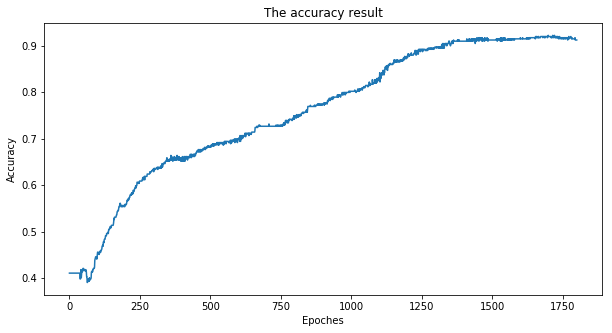

In [49]:
df = pd.DataFrame(res)
plt.plot(df['epoch'], df['accuracy'])
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('The accuracy result')
plt.show()

### Covert WAV sound files to dataset for indentify
    * use cmd commands to invoke R script to convert sound files 

The code invoked is motifed from < Kory Becker > is licensed UnderCC BY-NC-SA 4.0 License https://creativecommons.org/licenses/by-nc-sa/4.0/

In [74]:
os.system("runr.bat")

1

### Read the predict data

In [75]:
voicepredict = pd.read_csv('./data/voice.csv')
voicepredict = voicepredict.loc[:, ['meanfreq','sd','median','Q25','skew','IQR','sp.ent','sfm','mode','centroid','meanfun','minfun','meandom','maxdom','mindom','dfrange']].values.tolist()

### Use the trained model to predict gender

In [76]:
predict = sess.run(prediction,feed_dict={X: voicepredict,keep_prob: 1.0})
print(outputres(predict))

['male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'female']


## Conclusion
The whole process of this machine learning project is truly interesting. Basically, it proves that our hypothesis is correct ,the features that we chose are good input, our CNN model’s accuracy is around 95%, we test it with ten voice(6 of them are male, the rest are female) , the outcome is all correct.
It helps us go through the neural network model and many details. Convolutional neural network is suitable for the case that input contains too many dimensions, after the implement of convolution layer and max pool layer, the model would become more concise and readable. 
During our implementation of this project, we put a lot of effort into the improvement of model accuracy. We tried to reshape image in different size, change the network architecture, loss function, activation function, gradient estimation and parameter initialization, as a result, 4-5 hidden layers, cross entropy and Relu function, AdamOptimizer, Gaussian initialization serves as the best combinations in our test. This result also proves that our reasoning support our conclusion.
In the end, our record has no null value and outliers, which means the dataset we processed is a ‘cleaned’ dataset, so we didn’t spend much time on EDA, dataset that has null value and outliers would be more challenging.

## License 
The text in the document by < Zhixin Wang, Jiamin Shang > is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/<br>
The code in the document by < Zhixin Wang, Jiamin Shang > is licensed under the MIT License https://opensource.org/licenses/MIT

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

## Reference
* Kory Becker. Gender Recognition by Voice: https://www.kaggle.com/primaryobjects/voicegender

* Convolutional Neural Network for Visual Recognition: http://cs231n.github.io/convolutional-networks/

* Towards End-to-End Speech Recognition with Deep Convolutional Neural Networks:
https://arxiv.org/abs/1701.02720

* Improving End-to-End Models For Speech Recognition: https://research.googleblog.com/2017/12/improving-end-to-end-models-for-speech.html

* Shinji WatanabeMarc. New Era for Robust Speech Recognition. 2017

* Kory Becker. Identifying the Gender of a Voice using Machine Learning: https://github.com/primaryobjects/voice-gender
